<div class="alert alert-success">

## Instructions to students

If the assignment was fetched from the assignments tab, do not change the name of the assignment file(s).

### Code answers

In questions that require you to write code, there will be a code cell containing: 
    
<code># YOUR CODE HERE</code>
<br>
<code>raise NotImplementedError()</code>
    
When you are ready to write your answer, delete <code>raise NotImplementedError()</code> and write your code.

### Submitting your work
    
You should save your work before you submit ("Save" icon in top menu).
    
Before you submit, ensure that the notebook can be run from start to finish by pressing the "Restart & Run All" option in the "Kernel" menu above.
    
Once you are ready, go to the assignments tab on the Noteable landing page and click "Submit" on the relevant assignment.

</div>

**Question 11**: Pinball scattering is a purely Newtonian equations of motion exercise without feedback or random numbers but showing chaotic behaviour regardless.

Consider the potential $$V(x,y)=x^{2}\,y^{2}\,e^{-\left(x^{2}+y^{2}\right)}$$ (all terms dimensionless) with four maxima centred at $x=\pm{}1$ and $y=\pm{}1$, respectively. It is defined as a repulsive potential for any test particle (the pinball) moving through that potential. The equations of motion to solve hence are $$\frac{d^{2}x(t)}{dt^{2}} = -2.0\,y^{2}\,x\,(1-x^{2})\,e^{-\left(x^{2}+y^{2}\right)}$$ and $$\frac{d^{2}y(t)}{dt^{2}} = -2.0\,x^{2}\,y\,(1-y^{2})\,e^{-\left(x^{2}+y^{2}\right)}.$$

**Task**: Solve these two coupled ODE's using `solve_ivp` in two stages: 

**(a)** write a function `trajectory(impactpar, speed)` which takes the impact parameter, $x(0)$, as input as well as the speed $v_{y}$ for initial conditions (impact parameter$=x(0)$, $v_{x}=\frac{dx(0)}{dt}$, $y(0)$ and $v_{y}=\frac{dy(0)}{dt}$ in that order). Calculate the time array to solve for from `np.linspace(0,maxtime,300)` where `maxtime` works well as `10 / speed`. The function shall return the trajectory, i.e. the arrays of solved x(t) and y(t) separately. **Plot** a trajectory of your choice, see below, with appropriate axes labels.

As initial values, fix $v_{x}=\frac{dx(0)}{dt}=0.0$ and $y(0)=-2$ (away from the potential in $y$). The range of sensible initial values for $x(0)$, should be between $-0.9\leq{}x(0)\leq{}0.9$ but values around $0.1-0.2$ are quite interesting to observe. Likewise, pick an initial speed $0<v_{y}=\frac{dy(0)}{dt}\leq{}0.5$.

**(b)** Write a function `scatterangles(allb, speed)` which takes an array of impact parameter from the interval $[-0.2, 0.2]$ with a step size of 0.001 as input as well as a speed value. Use the same time array as in part (a). Loop over the impact parameter values, solve the ODE's and determine the scatter angle. Again, as initial values, fix $v_{x}=\frac{dx(0)}{dt}=0.0$ and $y(0)=-2$. Fix the speed input value at $v_{y}=0.1$ when calling the `scatterangles(allb, speed)` function before plotting the result, see below.

That scatter angle is determined from the final value of **velocity components**, i.e. $\theta=\tan^{-1}(v_{y}/v_{x})$ at the maximum time value. Store the scatter angle at each loop iteration and return it as an array. **Plot** the scatter angle as a function of impact parameter with appropriate axes labels. Note that the imported python math function `atan2(y,x)` has the correct and safe return range of $-\pi\leq{}\theta\leq{}\pi$ since backscattering of the pinball can and will take place.

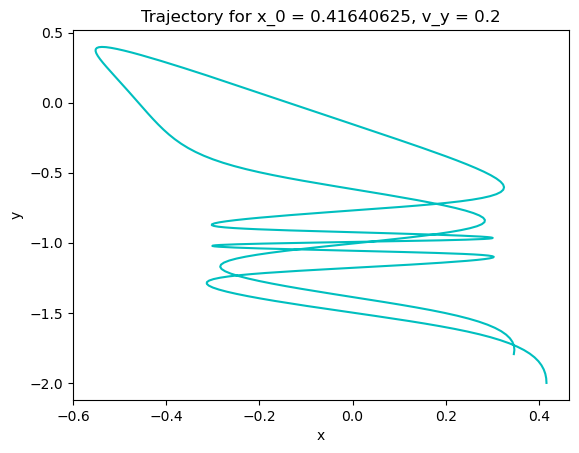

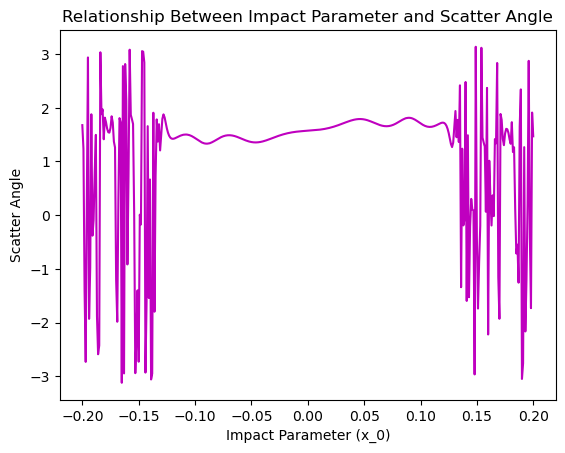

In [1]:
# Solution to part (a)
# YOUR CODE HERE
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from math import atan2

#let u = x', w = y', then u' = -2.0y^2x(1-x^2)e^(-(x^2+y^2)), w' = -2.0x^2y(1-y^2)e^(-(x^2+y^2)). Then consider v = [x,u,y,w]
#note difference from Q9
def RHS(t,v):
    x = v[0]
    u = v[1]
    y = v[2]
    w = v[3]
    return np.array([u,-2.0*(y**2)*x*(1-x**2)*np.exp(-(x**2+y**2)),w,-2.0*(x**2)*y*(1-y**2)*np.exp(-(x**2+y**2))])

def trajectory(impactpar, speed):
    maxtime = 10/speed
    timearr = np.linspace(0,maxtime,300)
    init = np.array([impactpar,0.0,-2,speed])
    sol = solve_ivp(RHS, (timearr[0],timearr[-1]), init, t_eval = timearr)
    v = sol.y
    x = v[0]
    y = v[2]
    return x,y

x_0 = 0.41640625
v_y = 0.2
x,y = trajectory(x_0, v_y)

plt.plot(x,y,'c')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory for x_0 = ' + str(x_0) + ', v_y = ' + str(v_y))
plt.show()

# Solution to part (b)
# YOUR CODE HERE

def scatterangles(allb, speed):
    maxtime = 10/speed
    timearr = np.linspace(0,maxtime,300)
    scat = []
    for imp in allb:
        init = np.array([imp,0.0,-2,speed])
        sol = solve_ivp(RHS, (timearr[0],timearr[-1]), init, t_eval = timearr)
        v = sol.y
        u = v[1]
        w = v[3]
        u_final = u[-1]
        w_final = w[-1]
        theta = atan2(w_final,u_final)
        scat.append(theta)
    return np.array(scat)

i_p_array = np.arange(-0.2,0.201,0.001)
v_y = 0.1
scatter = scatterangles(i_p_array, v_y)

plt.plot(i_p_array, scatter, 'm')
plt.xlabel('Impact Parameter (x_0)')
plt.ylabel('Scatter Angle')
plt.title('Relationship Between Impact Parameter and Scatter Angle')
plt.show()

Manual plot marking with feedback where appropriate.

In [ ]:
# Test cell, do not delete

In [ ]:
# Test cell, do not delete

### Tests 2 marks; Plots - 3 marks